In [55]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import os
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from pylab import savefig

In [56]:
#import data from Ethan
all_beer_df = pd.read_csv('style_category_toSQL.csv', encoding="latin1")

#trim data to needed X colums
print(all_beer_df.columns)
beer_char = all_beer_df[["OG","FG","ABV","IBU","Color","BoilTime","Efficiency"]]
beer_char_std = stats.zscore(beer_char)

#Set beer_char as X 
X=beer_char_std

Index(['BeerID', 'Name', 'Style', 'StyleID', 'OG', 'FG', 'ABV', 'IBU', 'Color',
       'BoilSize', 'BoilTime', 'Efficiency', 'ViewCount', 'BrewCount',
       'LastUpdated', 'Category'],
      dtype='object')


In [57]:
# create a kmeans model of k = 13 and fit the model to the data
kmeans = KMeans(n_clusters=13, random_state=0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=13, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [58]:
# use the data to predict the clusters and save the predictions as predict_clusters
predict_clusters = kmeans.predict(X)
labels = kmeans.labels_

In [59]:
# add cluster data columns
beer_char["clusters"] = labels
all_beer_df["clusters_7param"] = labels

C:\Users\brbal\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [60]:
# summarize cluster data
print(beer_char.groupby(["clusters"]).mean())

                 OG        FG        ABV          IBU      Color   BoilTime  \
clusters                                                                      
0          1.054770  1.012015   5.219588    28.226779   7.992240  59.061489   
1         13.268254  2.937029   5.557334    37.216861  10.627930  67.169979   
2          1.104129  1.023101  10.646940    63.886278  38.759300  65.012309   
3         18.857938  5.143560   7.618829    51.864356  21.399719  69.882904   
4          1.420345  1.094690  42.729310    13.070000  31.802414  59.310345   
5          1.062210  1.015769   6.017114    38.231755  34.488613  62.384900   
6          1.055789  1.012602   5.498621    39.910975   8.250597  57.645883   
7          1.086565  1.019252   8.869744    63.701537  19.381440  99.517656   
8          1.055433  1.012524   5.636072    33.224708   8.360988  88.615263   
9          1.075390  1.016937   7.682485   218.186667   9.621277  70.835476   
10         1.068075  1.016482   6.280464    45.52930

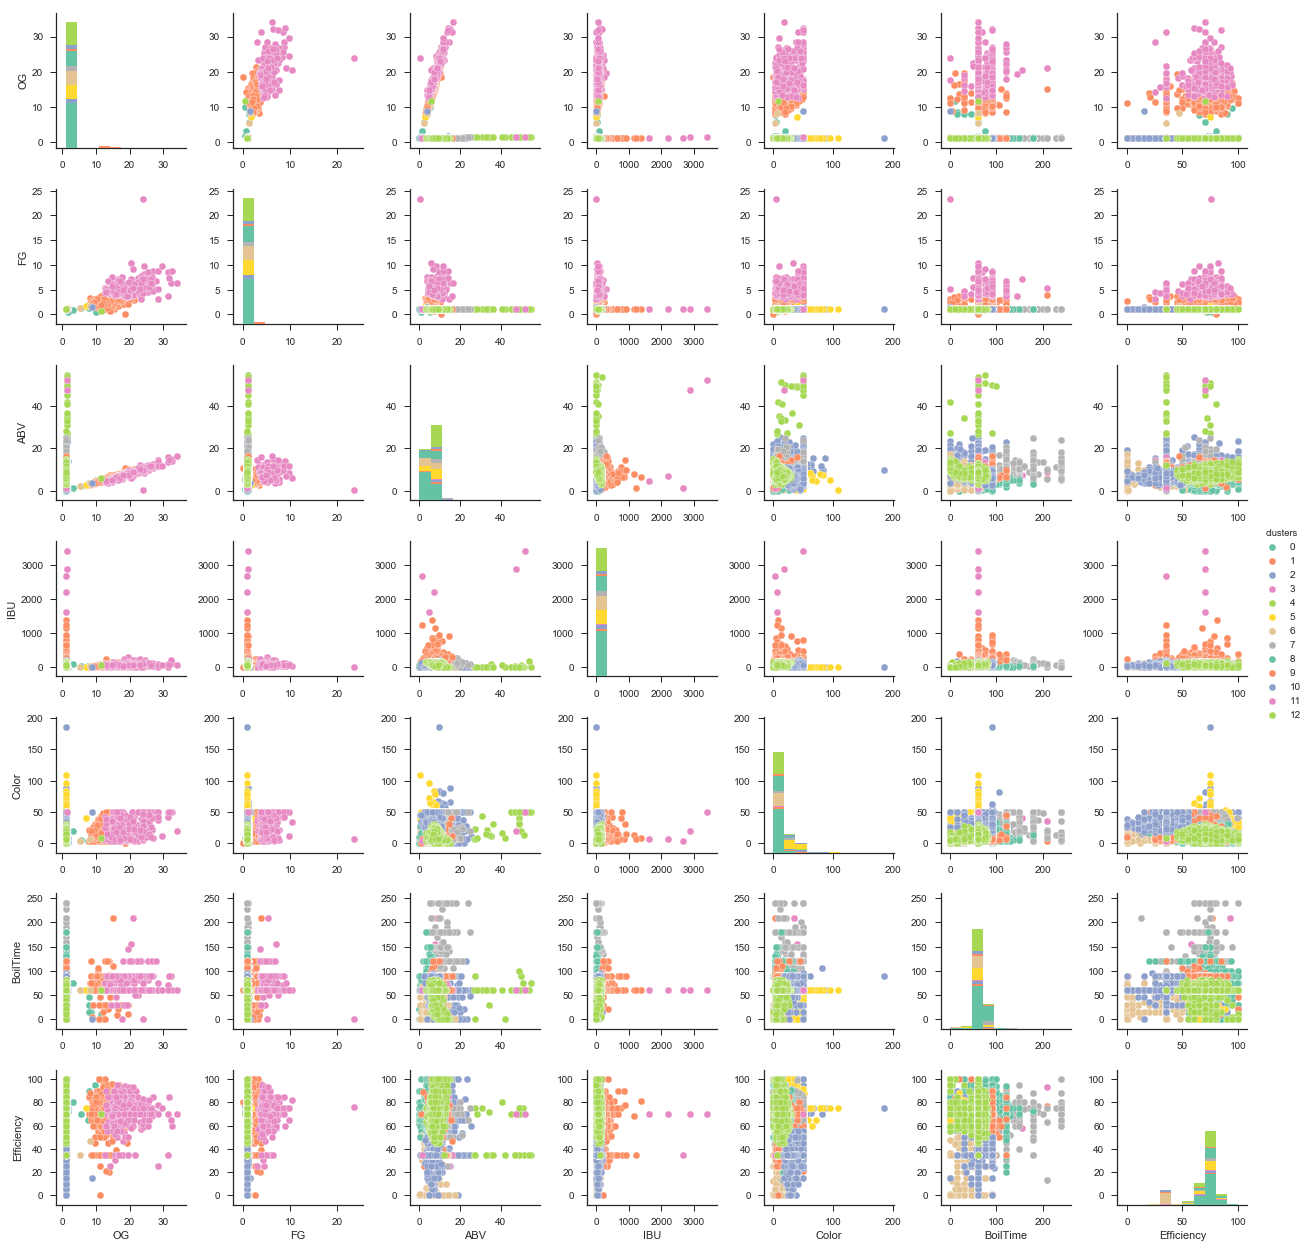

In [64]:
# visualize with scatterplot matrix
sns.set(style="ticks")
spm = sns.pairplot(beer_char, hue="clusters", 
                   vars=("OG","FG","ABV","IBU","Color","BoilTime","Efficiency"), palette="Set2")    
spm.savefig('spm_7param.png')

In [65]:
# double check df columns
all_beer_df.head()

,BeerID,Name,Style,StyleID,OG,FG,ABV,IBU,Color,BoilSize,BoilTime,Efficiency,ViewCount,BrewCount,LastUpdated,Category,clusters_7param
0,1,Vanilla Cream Ale,Cream Ale,45,1.055,1.013,5.48,17.65,4.83,28.39,75,70.0,150484.0,42.0,2016-06-14 00:00:00.000000,"Blondes, Pilsner, & Lighter Ales/Lagers",8
1,8,Spotted Clown (New Glarus Spotted Cow clone),Cream Ale,45,1.054,1.014,5.36,19.97,5.94,28.39,75,70.0,95189.0,18.0,2017-07-30 00:00:00.000000,"Blondes, Pilsner, & Lighter Ales/Lagers",8
2,43,Vanilla Caramel Cream Ale,Cream Ale,45,1.055,1.014,5.43,33.67,10.08,15.14,60,70.0,12216.0,7.0,2012-03-25 00:00:00.000000,"Blondes, Pilsner, & Lighter Ales/Lagers",0
3,200,Cream of Three Crops,Cream Ale,45,1.044,1.012,4.15,18.13,2.56,17.03,90,75.0,5538.0,2.0,2012-07-16 00:00:00.000000,"Blondes, Pilsner, & Lighter Ales/Lagers",8
4,244,Sleeman Cream Ale Clone,Cream Ale,45,1.055,1.015,5.22,19.73,4.74,28.40,60,70.0,4941.0,1.0,2012-11-14 00:00:00.000000,"Blondes, Pilsner, & Lighter Ales/Lagers",0


In [46]:
# create the revised data csv
all_beer_df.to_csv("data_add_7param_cluster.csv", index=False)